In [2]:
import numpy as np
%run Dolphins_data_import.ipynb
import sys
sys.path.append('../') # Change path
from Functions import * # Import Gradient_function

In [824]:
dim = 1000 # Define the dimension

In [825]:
mu = np.zeros(dim) # Define mean (mu) as a zero vector
identity_matrix = np.eye(dim) # dim x dim identity matrix
cov_matrix = 0.5 * identity_matrix + 0.5 # Define covariance matrix
num_samples = 62  # Number of samples you want to generate

points = {l+1: np.random.multivariate_normal(mu, cov_matrix) for l in range(num_samples)}

In [826]:
## distance in Gradient_function and Loss_function is changes to np.linalg.norm(point_1 - point_2)
def Gradient_function(point_number,index,Y,point):
    alpha = 5 # Define Alpha
    gradient = 0 # Define gradient for the Gradient_function
    for m in range(len(Y)): # Run over all "edges"
        if ((Y[m][1] == point_number) or (Y[m][2] == point_number)): # Check to see if point_number is part of the edge
            connection = Y[m][0] # Check to see if there is a connection
            distance = np.linalg.norm(point[Y[m][1]] - point[Y[m][2]]) # Calculate the euclidean distance
            point_index_diff = (point[point_number][index] - point[Y[m][1]][index]) + (point[point_number][index] - point[Y[m][2]][index]) # Calculate point_a,i-point_b,i
            numerator = -2 * connection * point_index_diff * np.exp(-connection * (alpha - distance)) # Calculate the numerator
            denominator = 1 + np.exp(-connection * (alpha - distance)) # Calculate the denominator
            gradient += numerator / denominator # Calculate the fraction and plus all connection there is with point_number together
    return gradient 

def Loss_function(point,Y):
    alpha = 5 # Define Alpha
    result = 0 # Define result for the Loss_function

    for m in range(len(Y)): # Run over all "edges"
        connection = Y[m][0] # Check to see if there is a connection
        point_1 = point[Y[m][1]] # Define coordinates for vertex 1
        point_2 = point[Y[m][2]] # Define coordinates for vertex 2
        distance = np.linalg.norm(point_1 - point_2) # Calculate the euclidean distance
        sigmoid_value = 1 / (1 + np.exp(-connection * (alpha - distance))) # Calculate the sigmoid function
        result += np.log(sigmoid_value) # Sum all the probabilities 
    return result

In [827]:
n = 10 # Number of iterations
MLL = np.zeros(n) # Define the MLL
for k in range(n):
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(dim): # Run over dimension
            points[i][j] += 0.1*Gradient_function(i,j,Y,points) # Use Gradient_function and take step=0.1*grad
            
    MLL[k] = Loss_function(points,Y) # Calcualte the probability using Loss_function

In [ ]:
# Save the steps, and add later on
step = np.zeros((num_samples,dim))
n = 5 # Number of iterations
graf = np.zeros(n) # Define the MLL
for k in range(n):
    for i in range(1,num_samples+1): # Run over number of num_samples
        for j in range(dim): # Run over dimension
            step[i-1][j] = 0.01*Gradient_function(i,j,Y,points) # Use !!THE OTHER!! Gradient_function and take step=0.1*grad

Text(0.5, 0, 'Iterration')

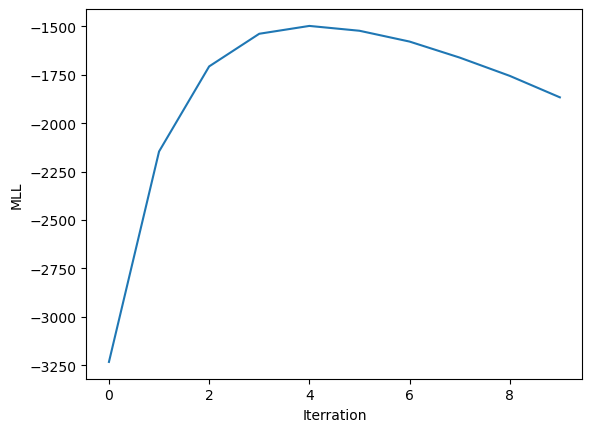

In [830]:
plt.plot(MLL)
plt.ylabel('MLL')
plt.xlabel('Iterration')

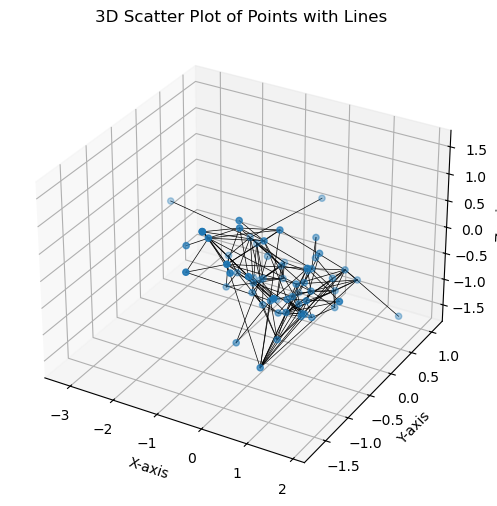

In [814]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for m in range(len(Y)):
    if Y[m][0] == 1:
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        ax.plot([point1[0], point2[0]], [point1[1], point2[1]], [point1[2], point2[2]], color='black', linewidth=0.5)

# Scatter plot of points in 3D
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
z = [point[2] for point in points.values()]
ax.scatter(x, y, z)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Scatter Plot of Points with Lines')
ax.grid(True)

plt.show()


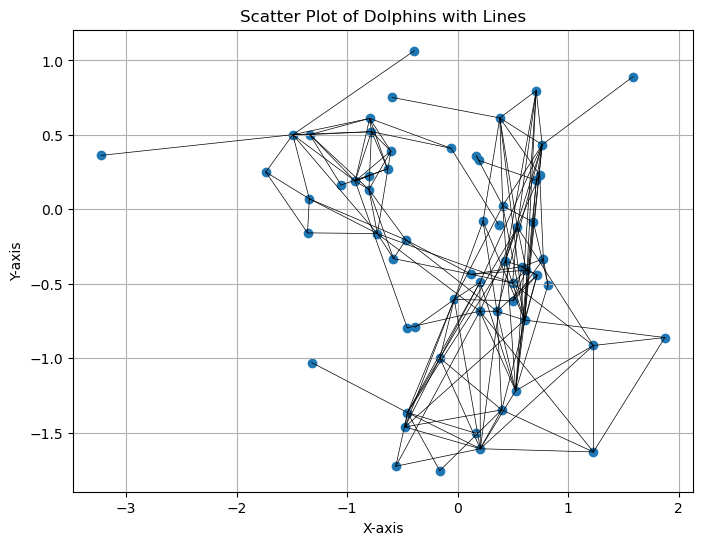

In [815]:
plt.figure(figsize=(8, 6))

for m in range(len(Y)): 
    if Y[m][0] == 1: # Check if there is a connection between Y[m][1] and Y[m][2]
        point1 = points[Y[m][1]]
        point2 = points[Y[m][2]]
        plt.plot([point1[0], point2[0]], [point1[1], point2[1]], color='black', linewidth=0.5) # Ad a line between Y[m][1] and Y[m][2]

# extract the points and plot them
x = [point[0] for point in points.values()]
y = [point[1] for point in points.values()]
plt.scatter(x, y)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Dolphins with Lines')
plt.grid(True)
plt.show()